In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import operator
import warnings
warnings.filterwarnings('ignore')

In [2]:
# ls

files_Q4_1 = [
    'RNN_ADAM_model=RNN_optimizer=ADAM_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_save_best_0',
    'GRU_SGD_LR_SCHEDULE_model=GRU_optimizer=SGD_LR_SCHEDULE_initial_lr=10_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_save_best_0',
    'TRANSFORMER_SGD_LR_SCHEDULE_model=TRANSFORMER_optimizer=SGD_LR_SCHEDULE_initial_lr=20_batch_size=128_seq_len=35_hidden_size=512_num_layers=6_dp_keep_prob=0.9_save_best_0'
]

# Q4_2 experiments are later augmented with Q4_1 experiments  
files_Q4_2 = [
    'GRU_ADAM_model=GRU_optimizer=ADAM_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_save_best_0',
    'GRU_SGD_model=GRU_optimizer=SGD_initial_lr=10_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_save_best_0',
    'RNN_SGD_LR_SCHEDULE_model=RNN_optimizer=SGD_LR_SCHEDULE_initial_lr=1_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_save_best_0',
    'RNN_SGD_model=RNN_optimizer=SGD_initial_lr=1_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_save_best_0',
    'TRANSFORMER_ADAM_model=TRANSFORMER_optimizer=ADAM_initial_lr=0.001_batch_size=128_seq_len=35_hidden_size=512_num_layers=2_dp_keep_prob=0.9_save_best_0',
    'TRANSFORMER_SGD_model=TRANSFORMER_optimizer=SGD_initial_lr=20_batch_size=128_seq_len=35_hidden_size=512_num_layers=6_dp_keep_prob=0.9_save_best_0',
    'TRANSFORMER_ADAM_model=TRANSFORMER_optimizer=ADAM_initial_lr=0.001_batch_size=128_seq_len=35_hidden_size=512_num_layers=6_dp_keep_prob=.9_0'
]

files_Q4_3 = [
    'GRU_SGD_LR_SCHEDULE_model=GRU_optimizer=SGD_LR_SCHEDULE_initial_lr=10_batch_size=20_seq_len=20_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_save_best_0',
    'GRU_SGD_LR_SCHEDULE_model=GRU_optimizer=SGD_LR_SCHEDULE_initial_lr=10_batch_size=20_seq_len=35_hidden_size=1000_num_layers=2_dp_keep_prob=0.35_save_best_0',
    'GRU_SGD_LR_SCHEDULE_model=GRU_optimizer=SGD_LR_SCHEDULE_initial_lr=10_batch_size=20_seq_len=35_hidden_size=1500_num_layers=1_dp_keep_prob=0.35_save_best_0',
    'GRU_SGD_LR_SCHEDULE_model=GRU_optimizer=SGD_LR_SCHEDULE_initial_lr=10_batch_size=20_seq_len=35_hidden_size=1500_num_layers=3_dp_keep_prob=0.35_save_best_0',
    'GRU_SGD_LR_SCHEDULE_model=GRU_optimizer=SGD_LR_SCHEDULE_initial_lr=10_batch_size=20_seq_len=35_hidden_size=2000_num_layers=2_dp_keep_prob=0.35_save_best_0',
    'GRU_SGD_LR_SCHEDULE_model=GRU_optimizer=SGD_LR_SCHEDULE_initial_lr=10_batch_size=20_seq_len=50_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_save_best_0',
    'RNN_ADAM_model=RNN_optimizer=ADAM_initial_lr=0.0001_batch_size=20_seq_len=20_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_save_best_0',
    'RNN_ADAM_model=RNN_optimizer=ADAM_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1000_num_layers=2_dp_keep_prob=0.35_save_best_0',
    'RNN_ADAM_model=RNN_optimizer=ADAM_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=1_dp_keep_prob=0.35_save_best_0',
    'RNN_ADAM_model=RNN_optimizer=ADAM_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=3_dp_keep_prob=0.35_save_best_0',
    'RNN_ADAM_model=RNN_optimizer=ADAM_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=2000_num_layers=2_dp_keep_prob=0.35_save_best_0',
    'RNN_ADAM_model=RNN_optimizer=ADAM_initial_lr=0.0001_batch_size=20_seq_len=50_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_save_best_0',
    'TRANSFORMER_SGD_LR_SCHEDULE_model=TRANSFORMER_optimizer=SGD_LR_SCHEDULE_initial_lr=20_batch_size=128_seq_len=20_hidden_size=512_num_layers=6_dp_keep_prob=0.9_save_best_0',
    'TRANSFORMER_SGD_LR_SCHEDULE_model=TRANSFORMER_optimizer=SGD_LR_SCHEDULE_initial_lr=20_batch_size=128_seq_len=35_hidden_size=256_num_layers=6_dp_keep_prob=0.9_save_best_0',
    'TRANSFORMER_SGD_LR_SCHEDULE_model=TRANSFORMER_optimizer=SGD_LR_SCHEDULE_initial_lr=20_batch_size=128_seq_len=35_hidden_size=512_num_layers=4_dp_keep_prob=0.9_save_best_0',
    'TRANSFORMER_SGD_LR_SCHEDULE_model=TRANSFORMER_optimizer=SGD_LR_SCHEDULE_initial_lr=20_batch_size=128_seq_len=35_hidden_size=512_num_layers=8_dp_keep_prob=0.9_save_best_0',
    'TRANSFORMER_SGD_LR_SCHEDULE_model=TRANSFORMER_optimizer=SGD_LR_SCHEDULE_initial_lr=20_batch_size=128_seq_len=35_hidden_size=768_num_layers=6_dp_keep_prob=0.9_save_best_0',
    'TRANSFORMER_SGD_LR_SCHEDULE_model=TRANSFORMER_optimizer=SGD_LR_SCHEDULE_initial_lr=20_batch_size=128_seq_len=50_hidden_size=512_num_layers=6_dp_keep_prob=0.9_save_best_0'
]


In [3]:
if not os.path.exists('figures'): os.makedirs('figures')

In [4]:
def categorize_experiments(experiments, exp, name):
    architecture = (name.split('_')[0]).lower()    
    optimizer = '_'.join((name.split('_')[1:-1])).lower()

    experiments[architecture].append(exp)
    experiments[optimizer].append(exp)
    
    return experiments  

In [15]:
def plot_it(experiments, fig_path, plt_type, include_train = False, fig_size = (10,6)):
    fig = plt.figure()
    plt.figure(figsize = fig_size)
    plt.grid()
    
    ax = plt.subplot(1,1,1)


    if plt_type == 'ppl_epoch':
        fig_title = 'PPL over epoch'
        fix_x_label = 'epoch'
        for i, exp in enumerate(experiments):
            txt_legend = '{}: seq_len: {} hidden_size: {} num_layers: {}'.format(exp['title'], exp['seq_len'], exp['hidden_size'], exp['num_layers'] )
            if include_train:
                plt.semilogy(exp['train_ppls'], '--', color = unq_colors[i], label = '{} (Train)'.format(txt_legend))
            plt.semilogy(exp['val_ppls'], '-', color = unq_colors[i], label = '{} (Val)'.format(txt_legend))
            
            # not scaled
            # plt.plot(exp['train_ppls'][1:], '--', color = unq_colors[i], label = 'Train {}'.format(txt_legend))
            # plt.plot(exp['val_ppls'][1:], '-', color = unq_colors[i], label = 'Val {}'.format(txt_legend))
            
    elif plt_type == 'ppl_wct':
        fig_title = 'PPL over wall-clock-time'
        fix_x_label = 'wall-clock-time'
        for i, exp in enumerate(experiments):
            wct = np.cumsum(exp['WCT'])  
            txt_legend = '{}: seq_len: {} hidden_size: {} num_layers: {}'.format(exp['title'], exp['seq_len'], exp['hidden_size'], exp['num_layers'] )
            if include_train:
                plt.semilogy(wct, exp['train_ppls'], '--', color = unq_colors[i], label = '{} (Train)'.format(txt_legend))
            plt.semilogy(wct, exp['val_ppls'], '-', color = unq_colors[i], label = '{} (Val)'.format(txt_legend))
    else:
        print('invalid plot type. must be either ppl_wct or ppl_epoch')
        raise
        
    plt.autoscale(enable = True, axis = 'x', tight = True)
    plt.title(fig_title)
    plt.xlabel(fix_x_label)
    plt.ylabel('PPL')
    
    handles, labels = ax.get_legend_handles_labels()

    # sort legend labels
    hl = sorted(zip(handles, labels), key = operator.itemgetter(1))
    handles, labels = zip(*hl)
    ax.legend(handles, labels)
    
    figname = '{}_{}.png'.format(part, plt_type)
    plt.savefig('{}{}'.format(fig_path, figname), dpi = 100)
    
    return None

In [6]:
def parse_experiments(part, files):
    
    experiments = []
    
    for f in files:
        fname = '{}/{}/learning_curves.npy'.format(part, f)
        with open(fname, 'rb') as handle:
            exp = (np.load(handle)).tolist()

        # parse experiement info
        exp['title'] = f.split('=')[0]
        param_name = ['initial_lr', 'batch_size', 'seq_len', 'hidden_size','num_layers','dp_keep_prob']
        param_val  = [val.split('_')[0] for val in f.split('=')[3:8]]

        exp_info = dict(zip(param_name, param_val))
        exp.update(exp_info)
        experiments.append(exp)
    
    return experiments

In [7]:
all_experiments = {}

all_experiments['rnn'] = []
all_experiments['gru'] = []
all_experiments['transformer'] = []

all_experiments['adam'] = []
all_experiments['sgd'] = []
all_experiments['sgd_lr_schedule'] = []

In [8]:
unq_colors =[
    'green',
    'red',
    'blue',
    'darksalmon',
    'darkturquoise',
    'darkseagreen',
    'darkmagenta',
    'black',
    'gold',
    'darkgray',
    'pink',
    'darkred',
    'lightcoral',
    'darkorange',
    'orange',
    'darkorchid',
    'darkkhaki',
    'cornsilk'
]

## Q4 (1)

In [9]:
if not os.path.exists('figures/4_1'): os.makedirs('figures/4_1')

<Figure size 432x288 with 0 Axes>

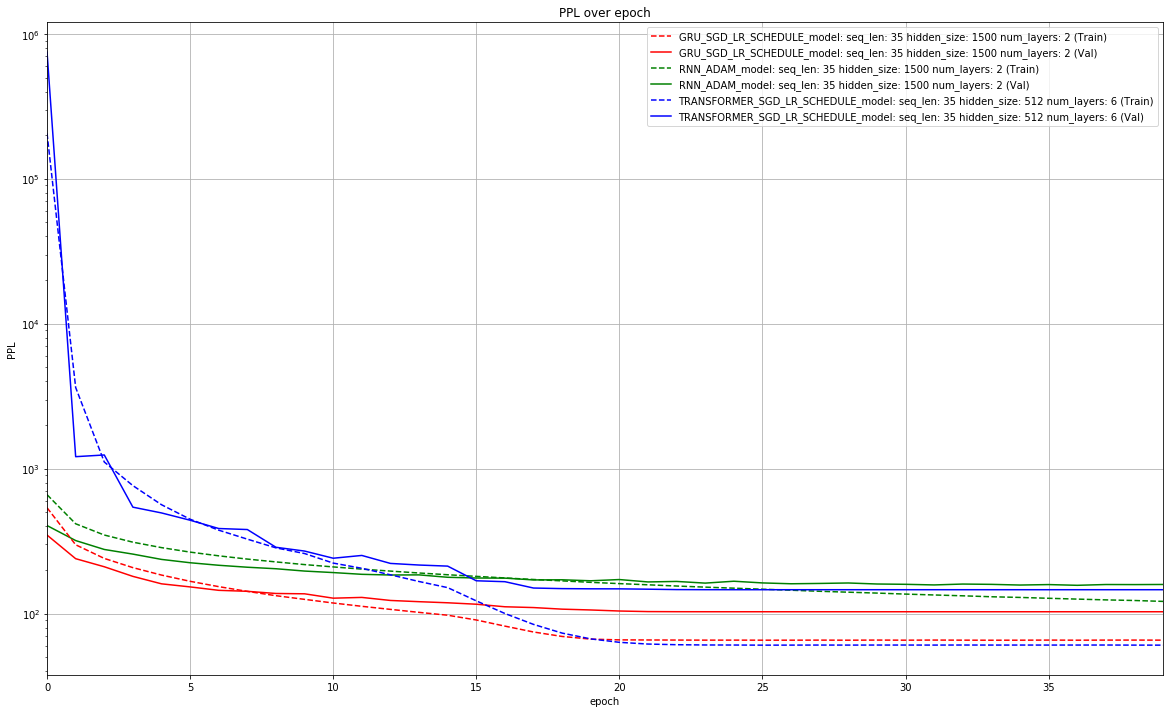

<Figure size 432x288 with 0 Axes>

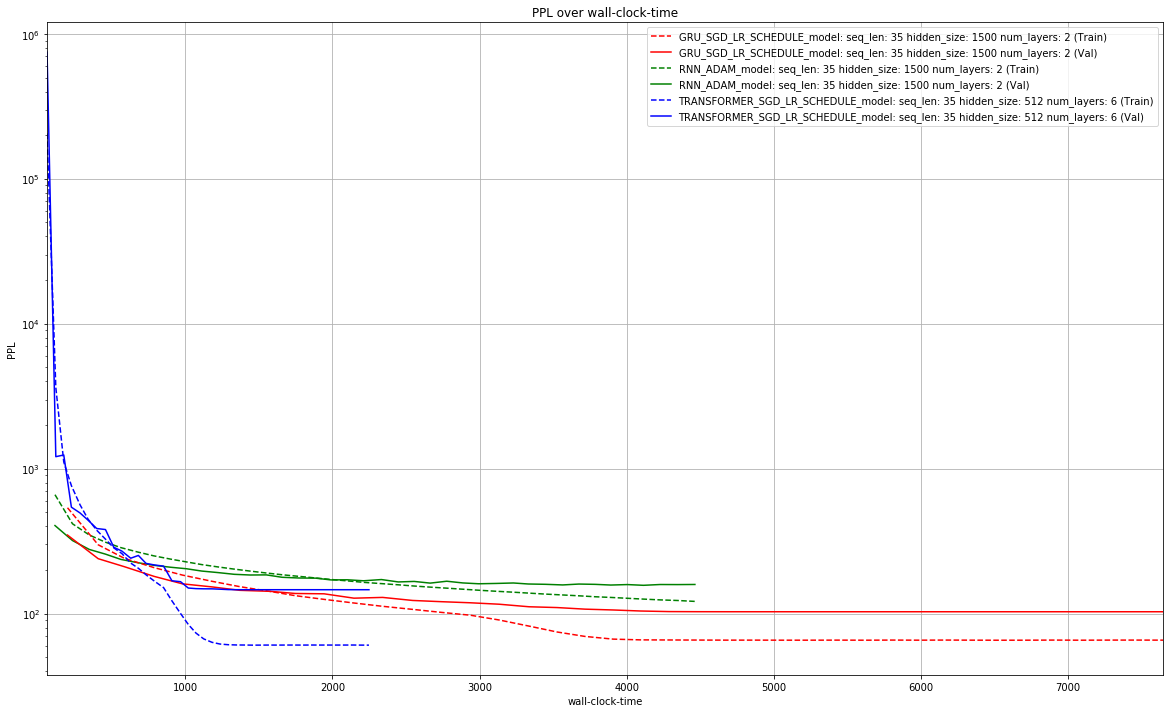

In [16]:
part = '4_1'
fig_path = 'figures/4_1/'
experiments_Q4_1 = parse_experiments('4_1', files_Q4_1)

plt_type = 'ppl_epoch'
plot_it(experiments_Q4_1, fig_path, plt_type, include_train = True, fig_size = (20,12))

plt_type = 'ppl_wct'
plot_it(experiments_Q4_1, fig_path, plt_type, include_train = True, fig_size = (20,12))

# Q4 (2)

In [11]:
if not os.path.exists('figures/4_2'): os.makedirs('figures/4_2')

<Figure size 432x288 with 0 Axes>

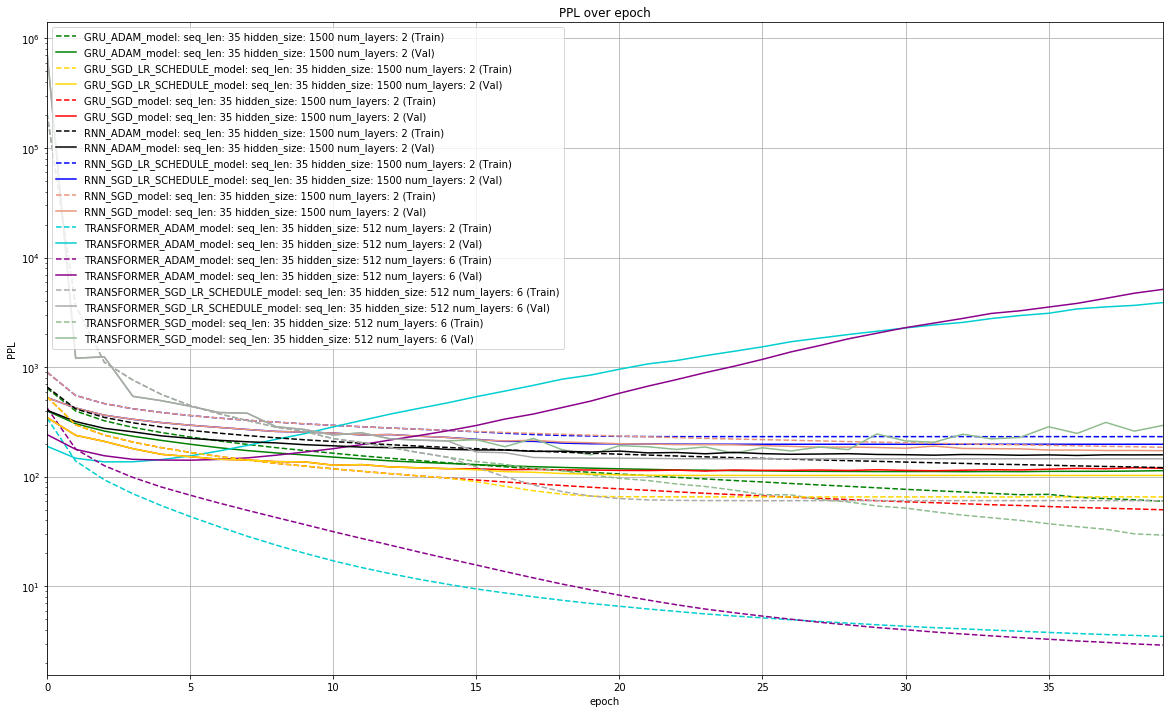

<Figure size 432x288 with 0 Axes>

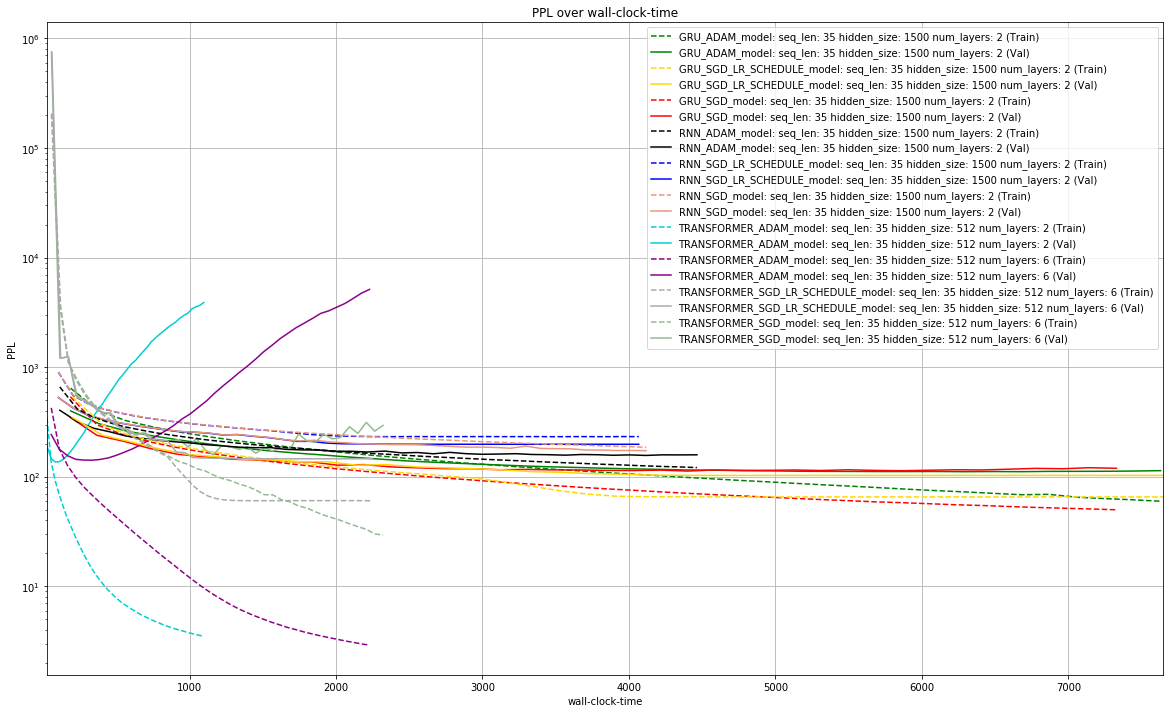

In [17]:
part = '4_2'
fig_path = 'figures/4_2/'
experiments_Q4_2 = parse_experiments('4_2', files_Q4_2) 
experiments_Q4_2.extend(experiments_Q4_1)

plt_type = 'ppl_epoch'
plot_it(experiments_Q4_2, fig_path, plt_type, include_train = True, fig_size = (20,12))

plt_type = 'ppl_wct'
plot_it(experiments_Q4_2, fig_path, plt_type, include_train = True, fig_size = (20,12))

# Q4 (3)

In [18]:
if not os.path.exists('figures/4_3'): os.makedirs('figures/4_3')

<Figure size 432x288 with 0 Axes>

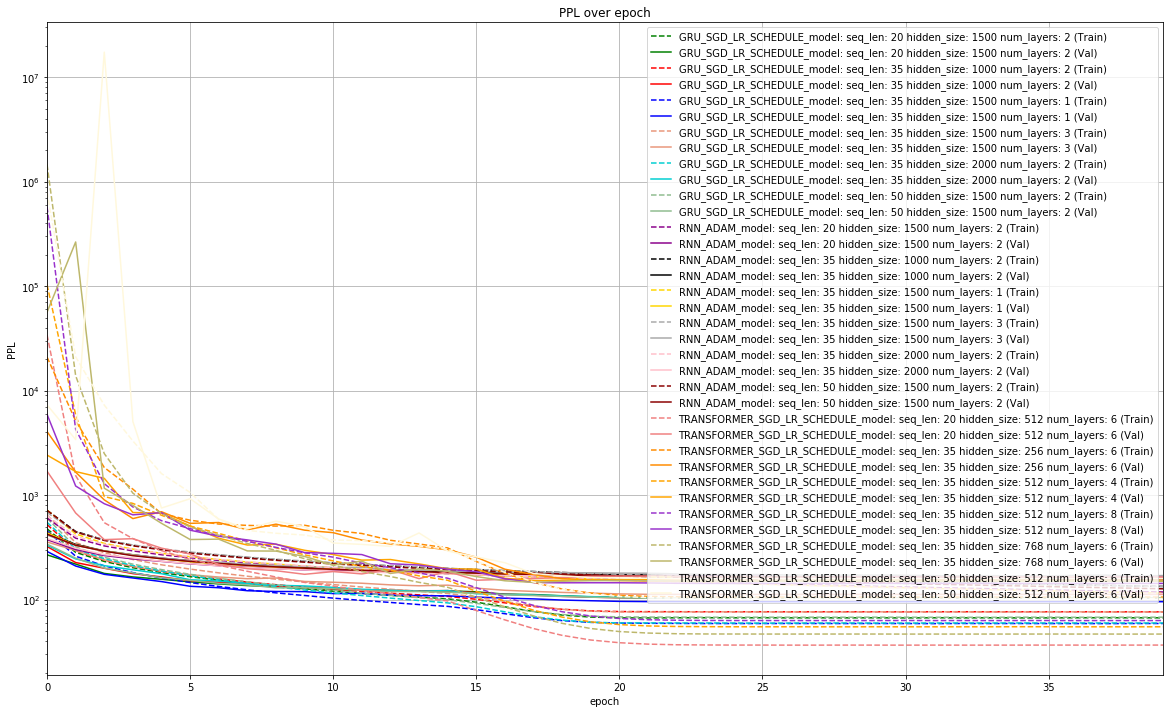

<Figure size 432x288 with 0 Axes>

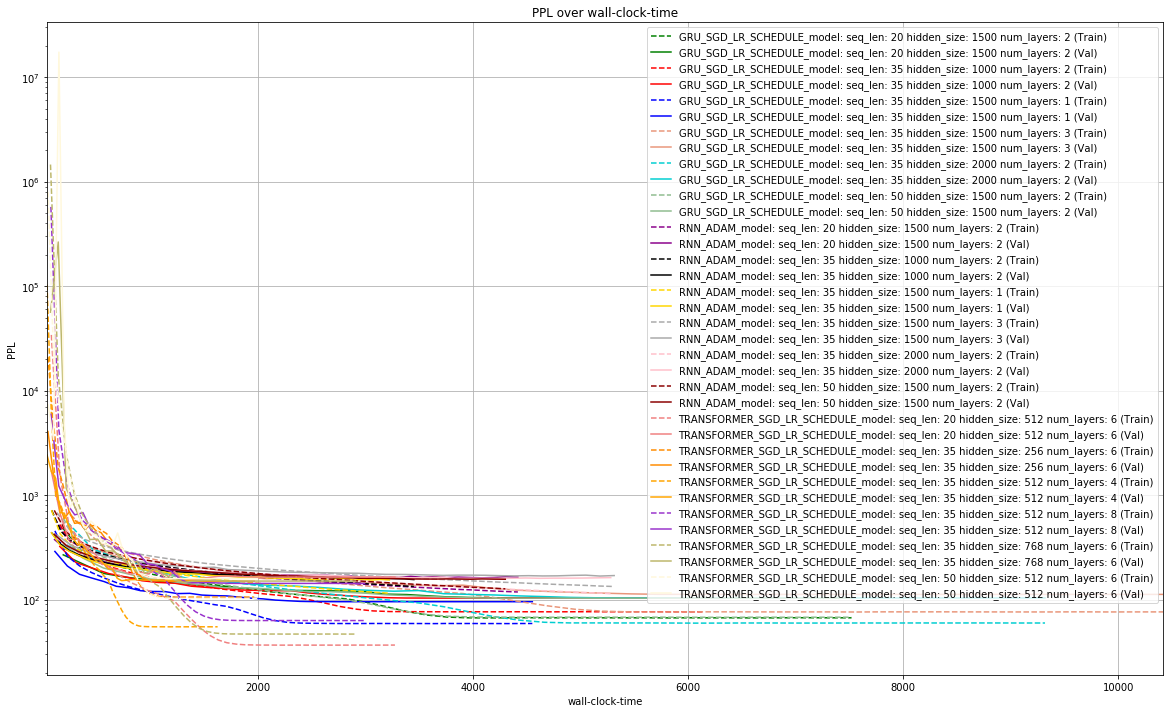

In [19]:
part = '4_3'
fig_path = 'figures/4_3/'
experiments_Q4_3 = parse_experiments('4_3', files_Q4_3) 

plt_type = 'ppl_epoch'
plot_it(experiments_Q4_3, fig_path, plt_type, include_train = False, fig_size = (20,12))

plt_type = 'ppl_wct'
plot_it(experiments_Q4_3, fig_path, plt_type, include_train = True, fig_size = (20,12))

## 4 (2) experiments grouped by architecture and optimizer

In [20]:
for exp in experiments_Q4_2:
    all_experiments = categorize_experiments(all_experiments, exp, exp['title'])
    
for exp in experiments_Q4_3:
    all_experiments = categorize_experiments(all_experiments, exp, exp['title'])

for k,v in all_experiments.items():
    print(k,':',len(v))

rnn : 9
gru : 9
transformer : 10
adam : 10
sgd : 3
sgd_lr_schedule : 15


# RNN Experiments

<Figure size 432x288 with 0 Axes>

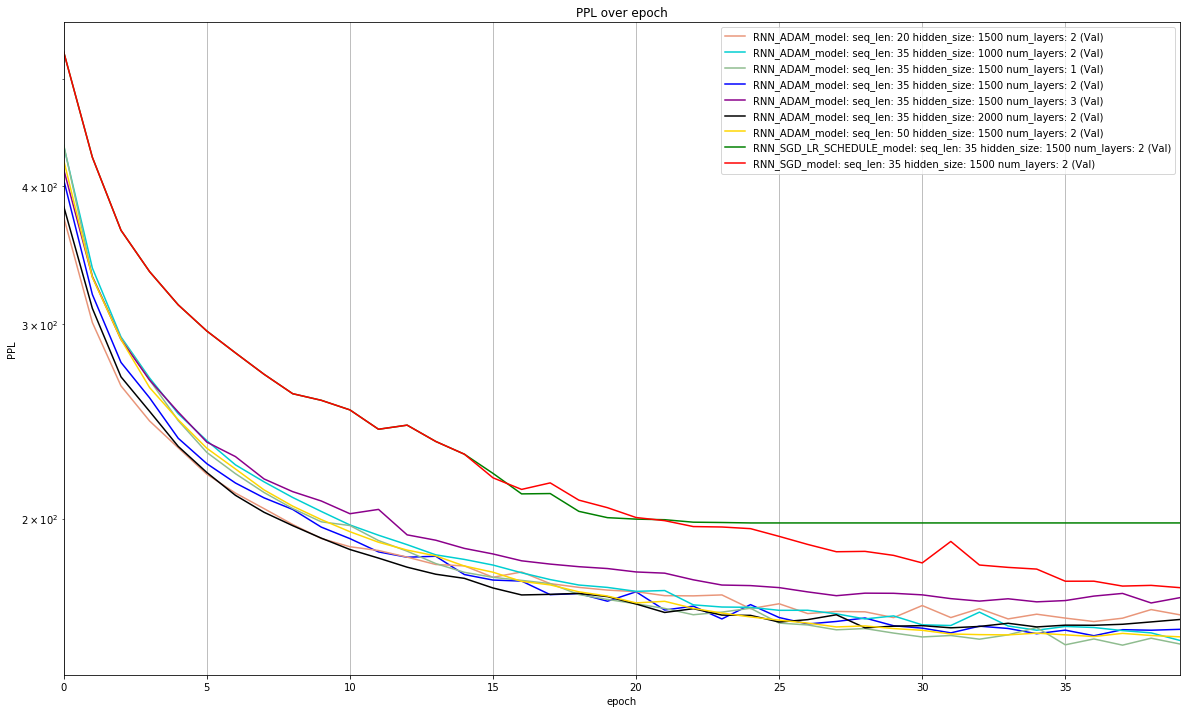

<Figure size 432x288 with 0 Axes>

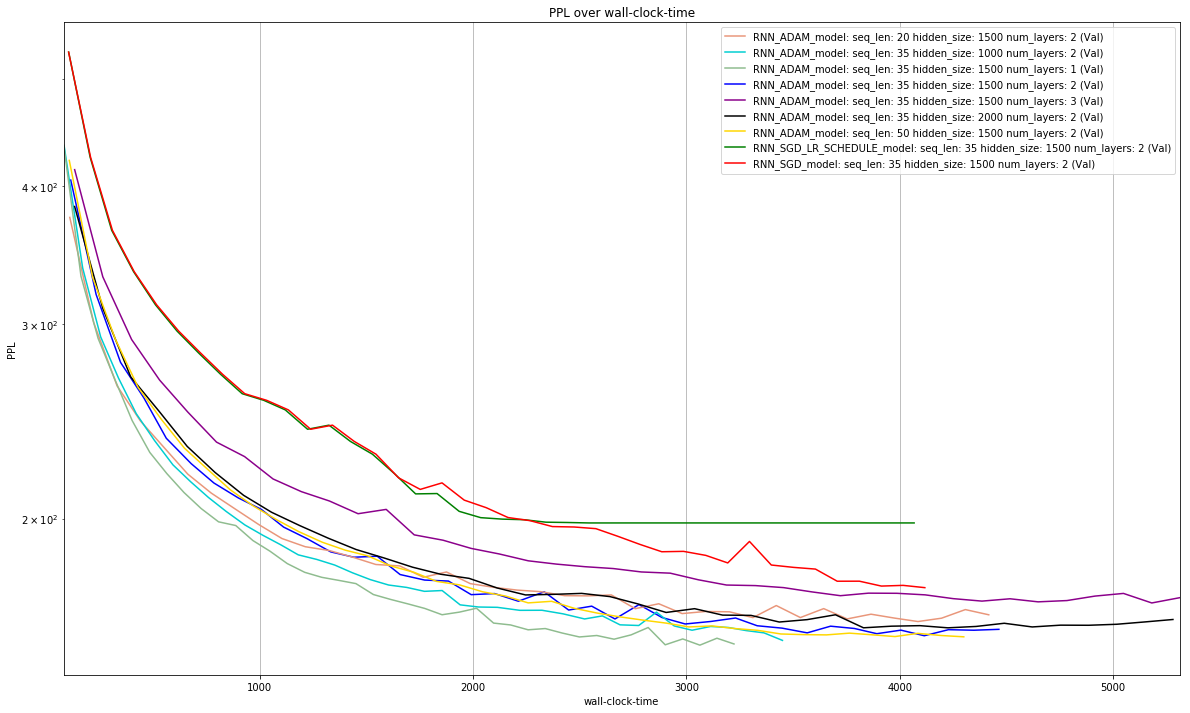

In [24]:
if not os.path.exists('figures/4_RNNs'): os.makedirs('figures/4_RNNs')
experiments = all_experiments['rnn']
fig_path = 'figures/4_RNNs/'
part = 'rnn'

plt_type = 'ppl_epoch'
plot_it(experiments, fig_path, plt_type, include_train = False, fig_size = (20,12))

plt_type = 'ppl_wct'
plot_it(experiments, fig_path, plt_type, include_train = False, fig_size = (20,12))

# GRU Experiments

<Figure size 432x288 with 0 Axes>

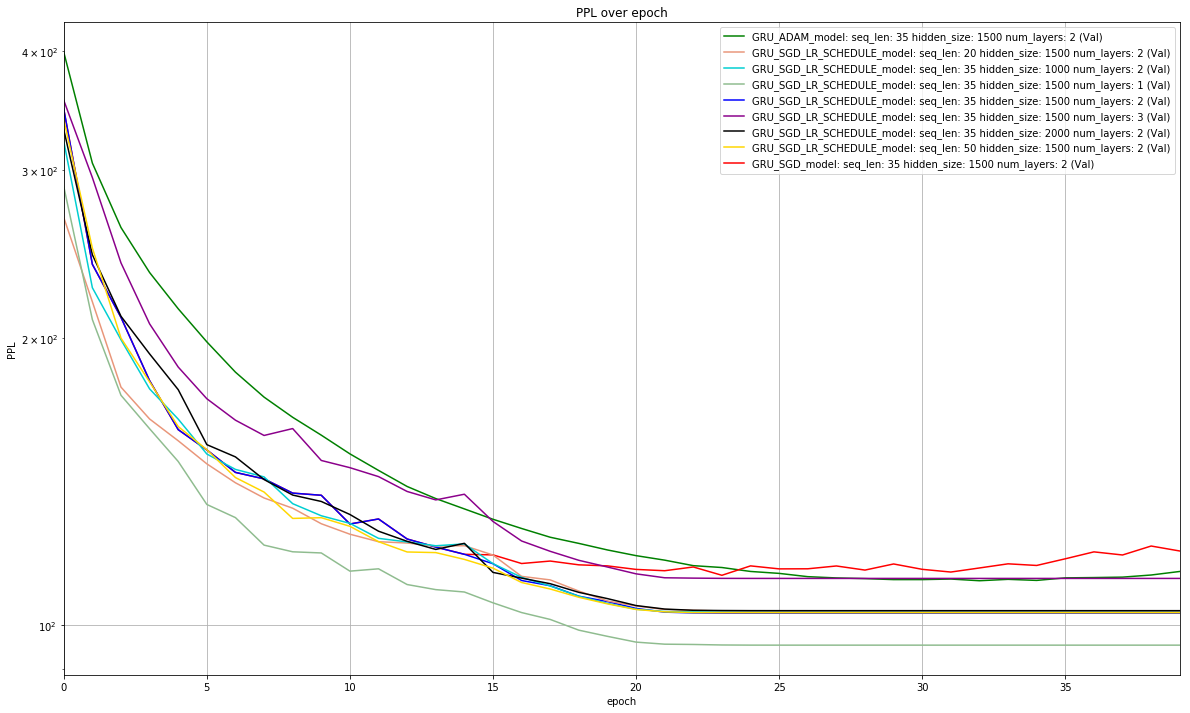

<Figure size 432x288 with 0 Axes>

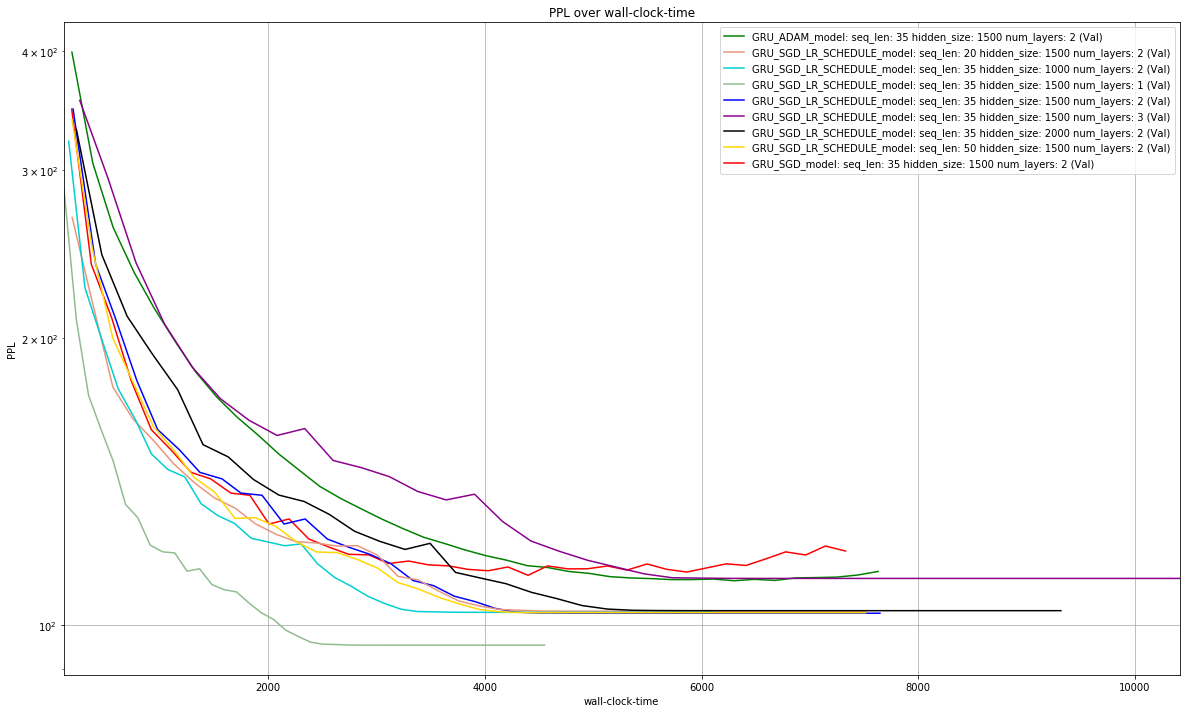

In [25]:
if not os.path.exists('figures/4_GRUs'): os.makedirs('figures/4_GRUs')
experiments = all_experiments['gru']
fig_path = 'figures/4_GRUs/'
part = 'gru'

plt_type = 'ppl_epoch'
plot_it(experiments, fig_path, plt_type, include_train = False, fig_size = (20,12))

plt_type = 'ppl_wct'
plot_it(experiments, fig_path, plt_type, include_train = False, fig_size = (20,12))

# Transformer Experiments

<Figure size 432x288 with 0 Axes>

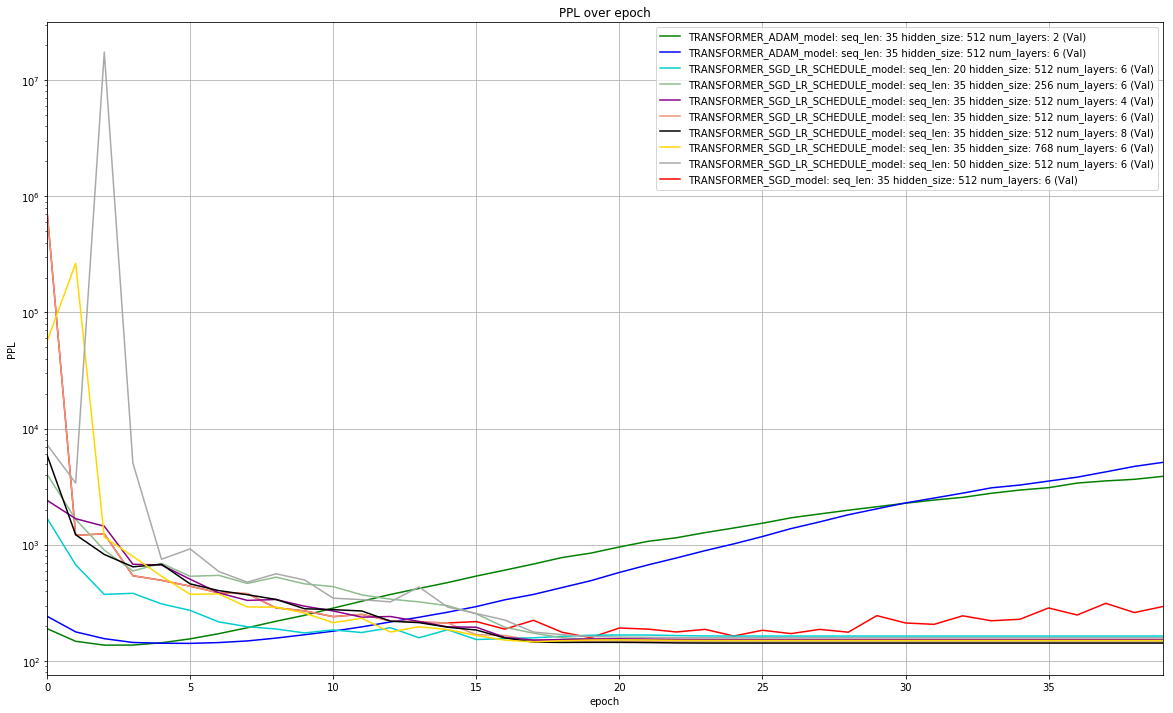

<Figure size 432x288 with 0 Axes>

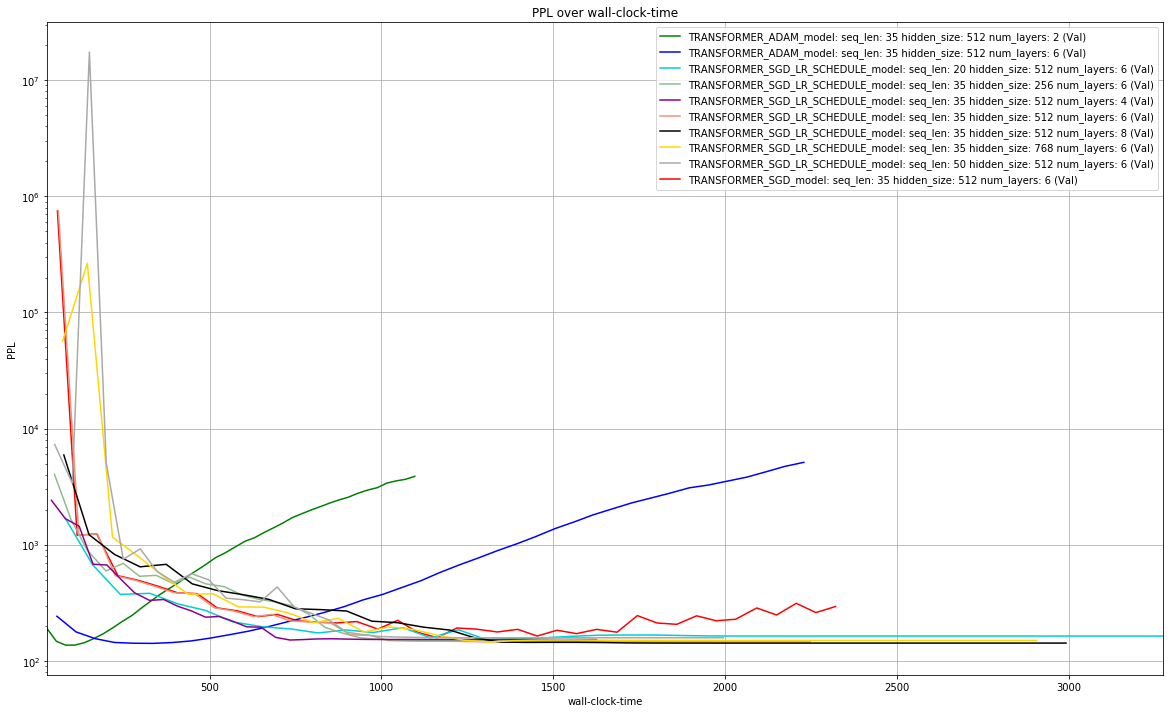

In [26]:
if not os.path.exists('figures/4_Transformers'): os.makedirs('figures/4_Transformers')
experiments = all_experiments['transformer']
fig_path = 'figures/4_Transformers/'
part = 'transformer'

plt_type = 'ppl_epoch'
plot_it(experiments, fig_path, plt_type, include_train = False, fig_size = (20,12))

plt_type = 'ppl_wct'
plot_it(experiments, fig_path, plt_type, include_train = False, fig_size = (20,12))

# ADAM Experiments

<Figure size 432x288 with 0 Axes>

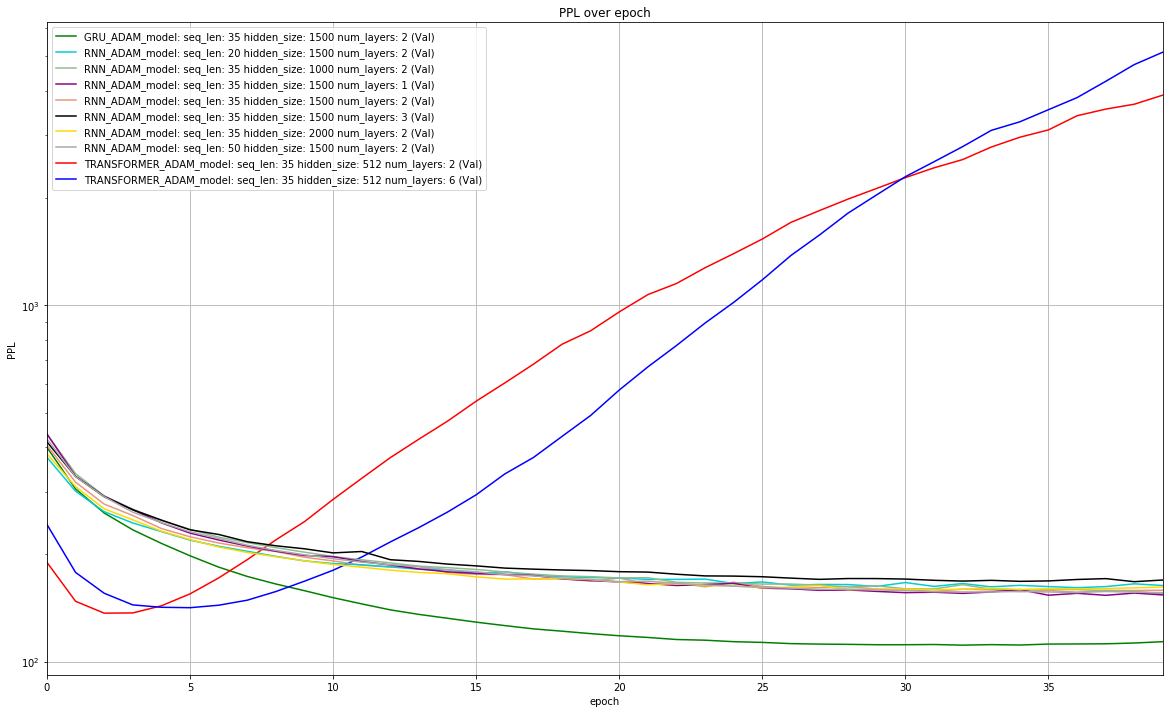

<Figure size 432x288 with 0 Axes>

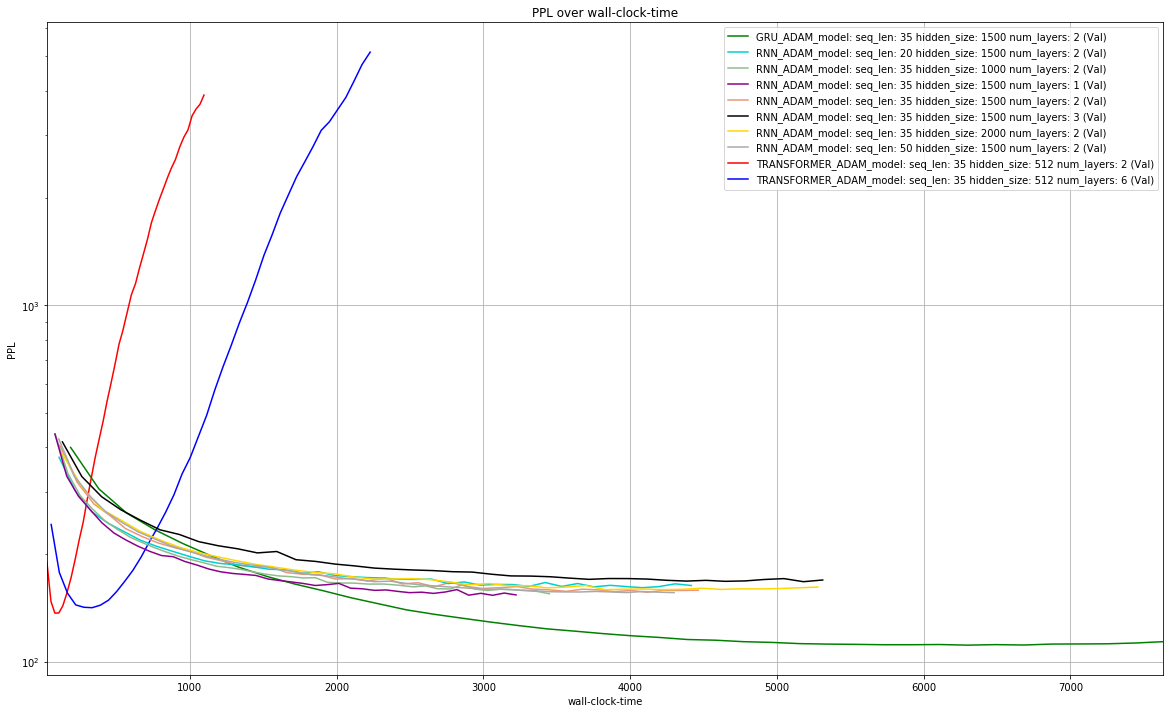

In [27]:
if not os.path.exists('figures/4_Adam'): os.makedirs('figures/4_Adam')
experiments = all_experiments['adam']
fig_path = 'figures/4_Adam/'
part = 'adam'

plt_type = 'ppl_epoch'
plot_it(experiments, fig_path, plt_type, include_train = False, fig_size = (20,12))

plt_type = 'ppl_wct'
plot_it(experiments, fig_path, plt_type, include_train = False, fig_size = (20,12))

# SGD Experiments

<Figure size 432x288 with 0 Axes>

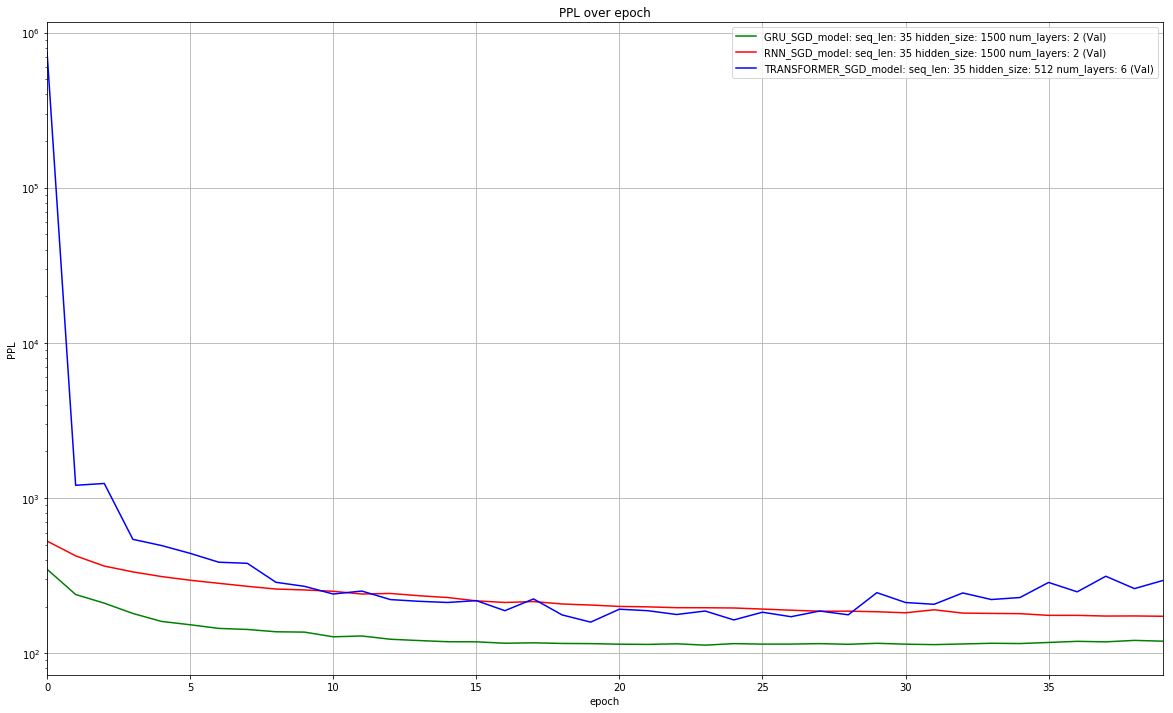

<Figure size 432x288 with 0 Axes>

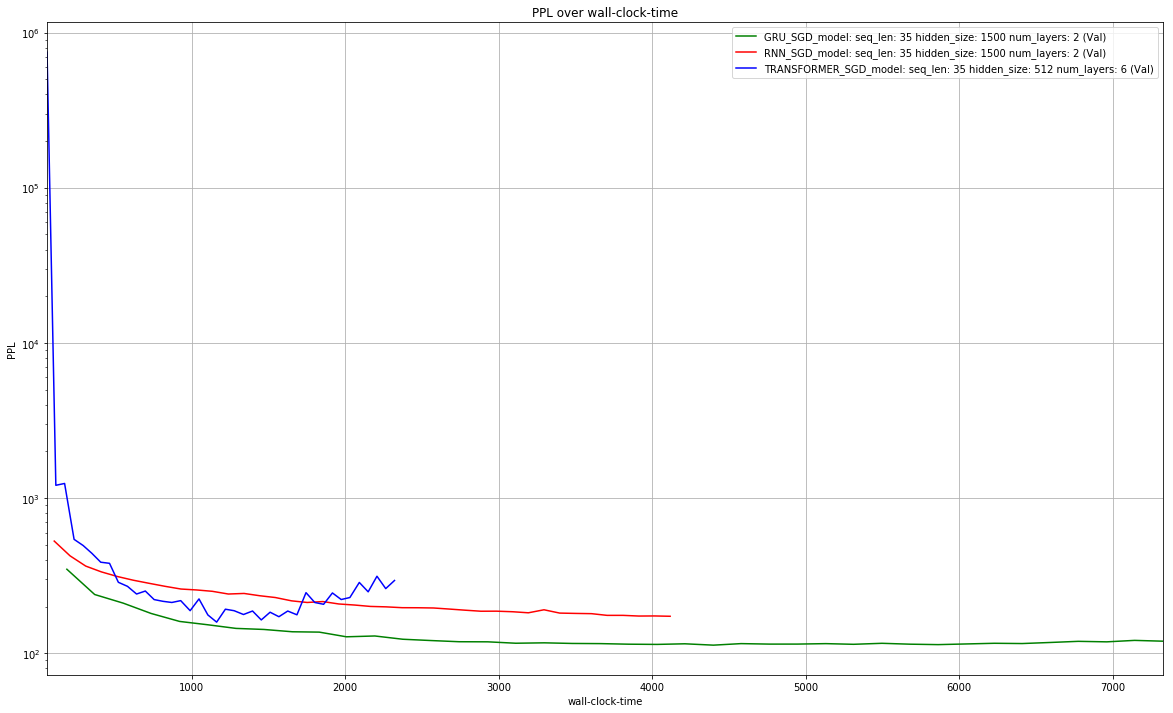

In [29]:
if not os.path.exists('figures/4_SGD'): os.makedirs('figures/4_SGD')
experiments = all_experiments['sgd']
fig_path = 'figures/4_SGD/'
part = 'sgd'

plt_type = 'ppl_epoch'
plot_it(experiments, fig_path, plt_type, include_train = False, fig_size = (20,12))

plt_type = 'ppl_wct'
plot_it(experiments, fig_path, plt_type, include_train = False, fig_size = (20,12))

# SGD LR Experiments

<Figure size 432x288 with 0 Axes>

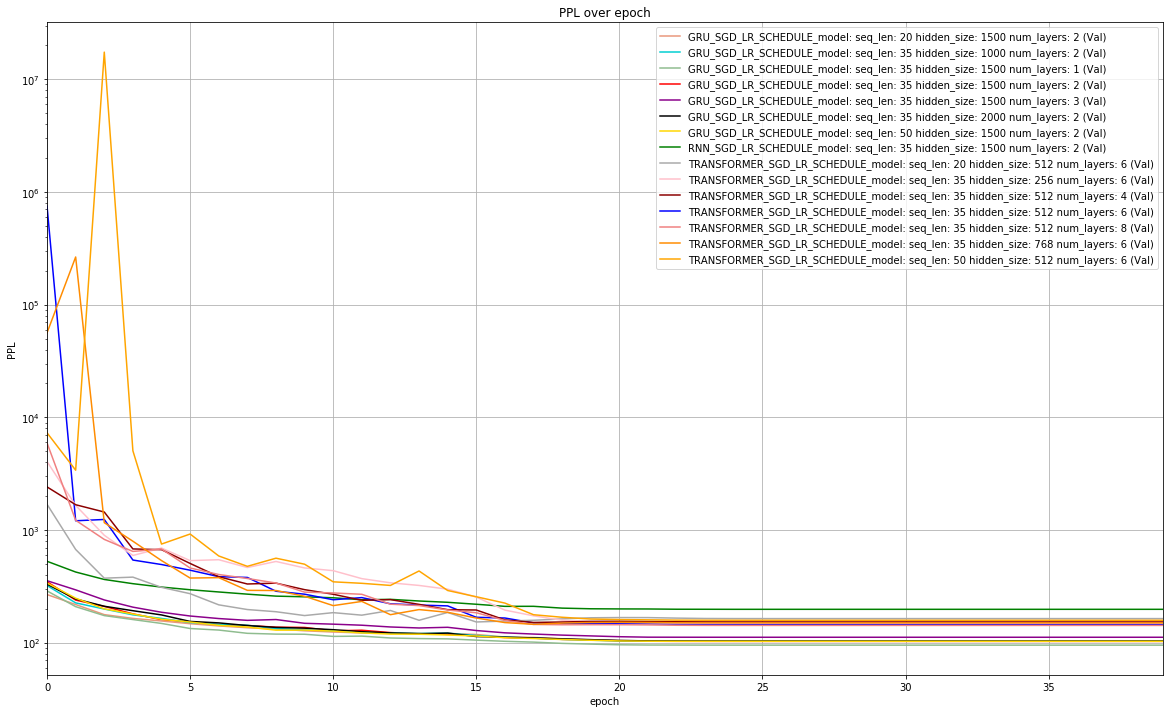

<Figure size 432x288 with 0 Axes>

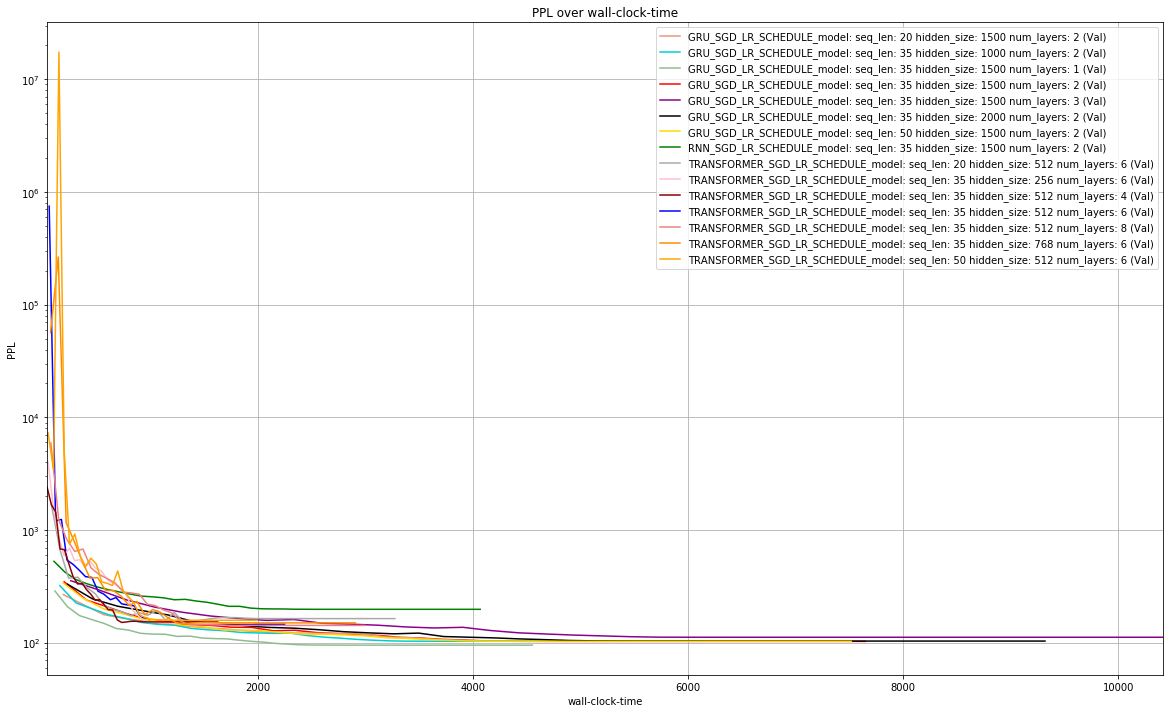

In [30]:
if not os.path.exists('figures/4_SGD_LR'): os.makedirs('figures/4_SGD_LR')
experiments = all_experiments['sgd_lr_schedule']
fig_path = 'figures/4_SGD_LR/'
part = 'sgdlr'

plt_type = 'ppl_epoch'
plot_it(experiments, fig_path, plt_type, include_train = False, fig_size = (20,12))

plt_type = 'ppl_wct'
plot_it(experiments, fig_path, plt_type, include_train = False, fig_size = (20,12))

In [ ]:
for k,v in all_experiments.items():
    print(k,':', len(v))

In [ ]:
for e in experiments_Q4_1:
    print(e['title'], e['batch_size'], e['hidden_size'], e['num_layers'])

In [ ]:
for e in experiments_Q4_2:
    print(e['title'], e['batch_size'], e['hidden_size'], e['num_layers'])

In [ ]:
for e in experiments_Q4_3:
    print(e['title'], e['batch_size'], e['hidden_size'], e['num_layers'])